[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EleonoraAiello/AIM23-24/blob/main/MLPnetwork.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

from sklearn import preprocessing, decomposition, model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [ ]:
!wget https://raw.githubusercontent.com/EleonoraAiello/AIM23-24/main/dataT1DEXIstudyVideo_sedentary.csv

In [ ]:
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'figure.figsize' : [10,6],
                     })

In [ ]:
dataTable = pd.read_csv("dataT1DEXIstudyVideo_sedentary.csv")
dataTable.head()
clean_dataTable = dataTable.dropna()

In [ ]:
exerciseData_activityClassifier=clean_dataTable.loc[:,['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC']]


random_state=1

X_train, X_test, y_train, y_test = model_selection.train_test_split(exerciseData_activityClassifier,
                                                                    clean_dataTable.ActivityCategorical,
                                                                    test_size=0.30,
                                                                    random_state=random_state)

In [ ]:
scaler = preprocessing.MinMaxScaler().fit(X_train)

df_scaled_X = scaler.transform(X_train)
df_scaled_X_test = scaler.transform(X_test)

y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [36]:
layers = (10,5)
max_iter = 5000

neuralNet = MLPClassifier(solver='adam', learning_rate_init=0.0001, hidden_layer_sizes=layers,
                          max_iter = max_iter, verbose=False, random_state=1, validation_fraction=0.1, early_stopping=True, n_iter_no_change=1000)
neuralNet.fit(df_scaled_X, y_train)

print('Training Accuracy: ', neuralNet.score(df_scaled_X, y_train))
print('Validation Accuracy: ', neuralNet.score(df_scaled_X_test, y_test))


Streaming output truncated to the last 5000 lines.
Validation score: 0.656000
Iteration 710, loss = 0.97468087
Validation score: 0.656000
Iteration 711, loss = 0.97419826
Validation score: 0.652000
Iteration 712, loss = 0.97366755
Validation score: 0.652000
Iteration 713, loss = 0.97314716
Validation score: 0.652000
Iteration 714, loss = 0.97265010
Validation score: 0.652000
Iteration 715, loss = 0.97216059
Validation score: 0.656000
Iteration 716, loss = 0.97164815
Validation score: 0.656000
Iteration 717, loss = 0.97118379
Validation score: 0.656000
Iteration 718, loss = 0.97069523
Validation score: 0.656000
Iteration 719, loss = 0.97014127
Validation score: 0.656000
Iteration 720, loss = 0.96967095
Validation score: 0.656000
Iteration 721, loss = 0.96916669
Validation score: 0.656000
Iteration 722, loss = 0.96867893
Validation score: 0.656000
Iteration 723, loss = 0.96818546
Validation score: 0.652000
Iteration 724, loss = 0.96767709
Validation score: 0.656000
Iteration 725, loss = 

"\n#pd.DataFrame(history.history).iloc[:, [1,3]].plot(ax=ax)\nplt.xlabel('Epochs')\nplt.xticks([0, 1, 2, 3, 4], [ 1, 2, 3, 4,5])\n"

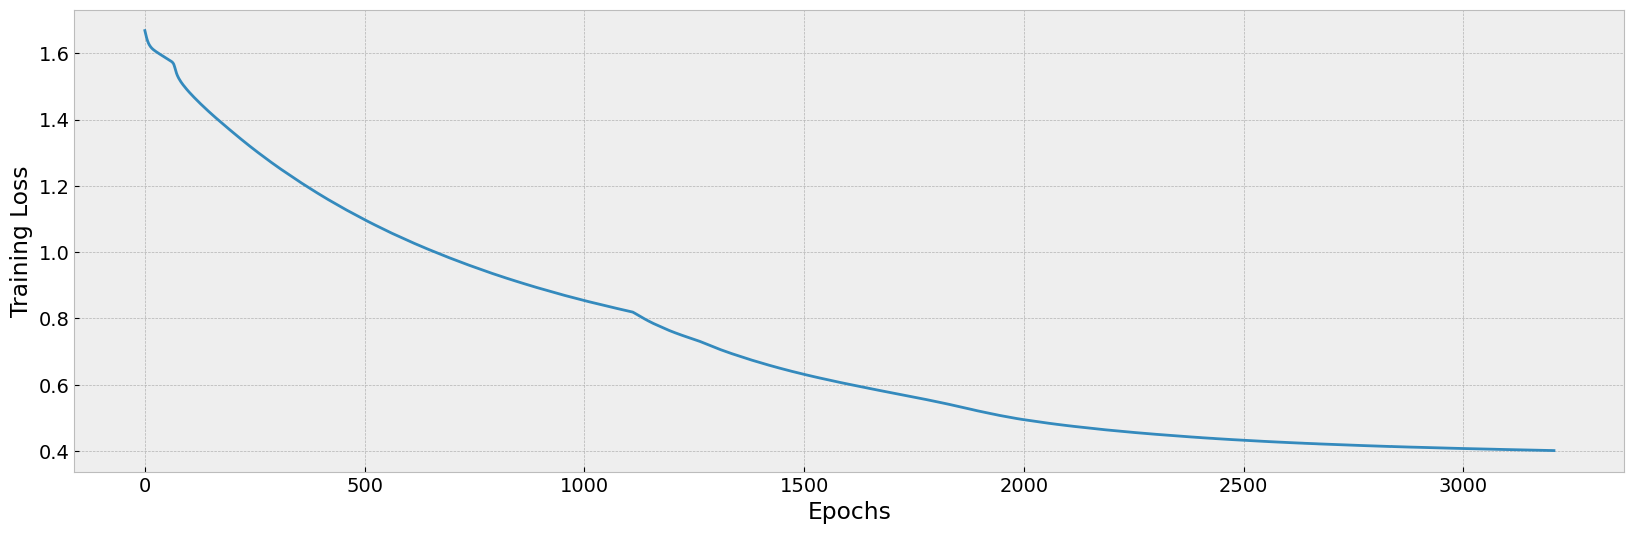

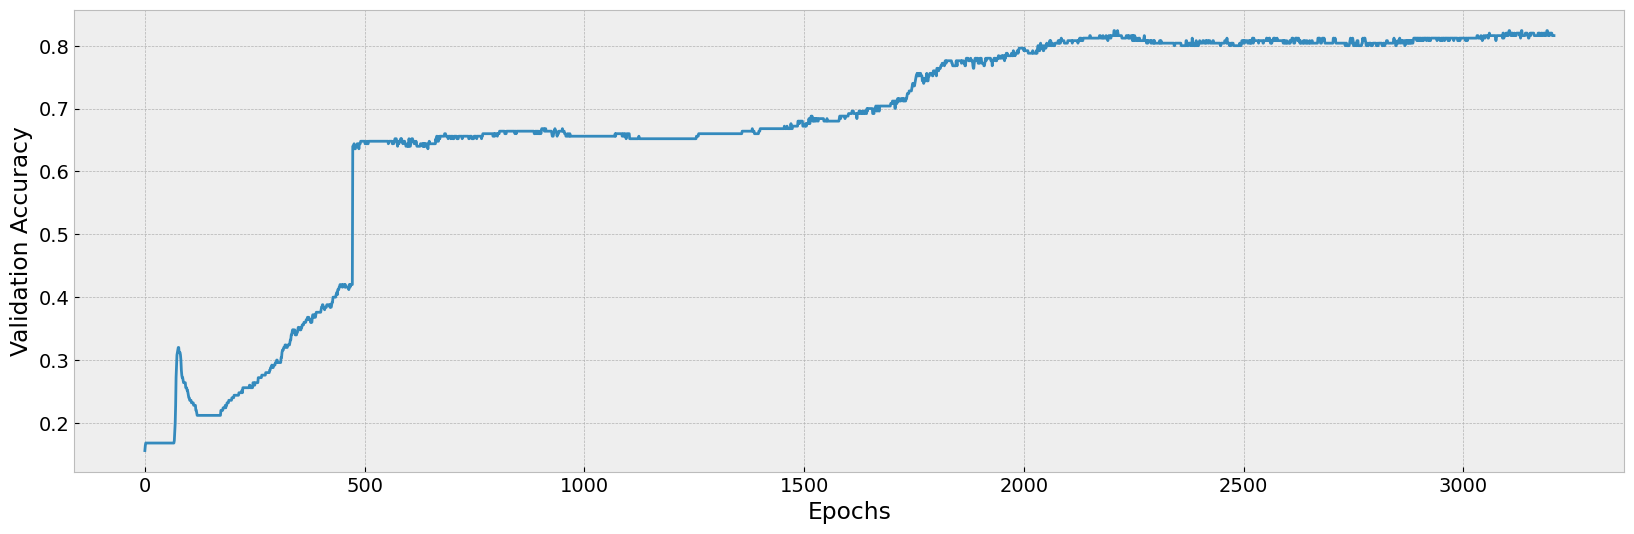

In [39]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(neuralNet.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(neuralNet.validation_scores_)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

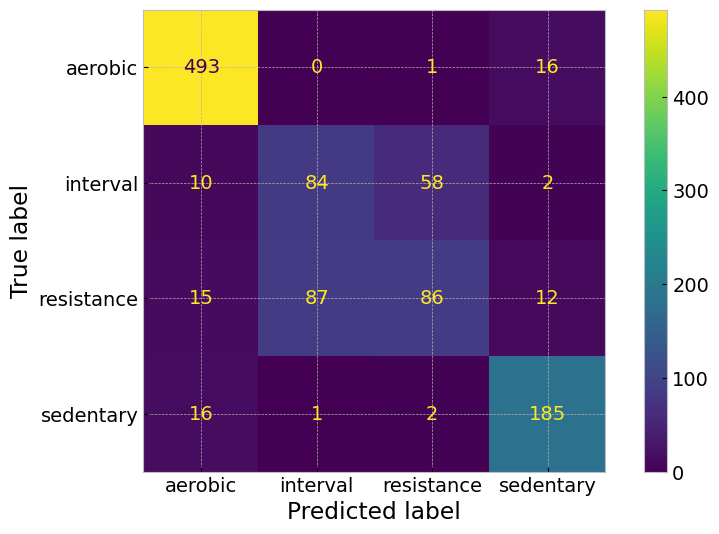

In [ ]:
predictions = neuralNet.predict(df_scaled_X_test)
cm = confusion_matrix(y_test, predictions, labels=neuralNet.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aerobic','interval','resistance','sedentary'])

disp.plot()
plt.show()